# Librerías

In [2]:
import pandas as pd
from palette_creator import PaletteCreator, show_palette
from pathlib import Path
import cv2
import json

# Funciones auxiliares

In [29]:
import numpy as np

def load_img(path_img):
    path_img = str(path_img)

    # Check if path exists
    if not Path(path_img).exists():
        print(f"Path {path_img} doesn't exist")
        return None
    
    return cv2.cvtColor(cv2.imread(path_img), cv2.COLOR_BGR2RGB)

class NumpyEncoder(json.JSONEncoder):
    """ Special json encoder for numpy types """
    def default(self, obj):
        if isinstance(obj, (np.int_, np.intc, np.intp, np.int8,
                            np.int16, np.int32, np.int64, np.uint8,
                            np.uint16, np.uint32, np.uint64)):
            return int(obj)
        elif isinstance(obj, (np.float_, np.float16, np.float32,
                              np.float64)):
            return float(obj)
        elif isinstance(obj, (np.ndarray,)):
            return obj.tolist()
        return json.JSONEncoder.default(self, obj)

def save_results_to_db(db, method, results): 
    palettes, proportions = map(list, zip(*results)) # descomprimir una lista de 2-tuplas en 2 listas
    db[f"{method}_palette"], db[f"{method}_proportions"] = palettes, proportions
    db[f"{method}_palette"] = db[f"{method}_palette"].apply(lambda x: json.dumps(x, cls=NumpyEncoder))
    db[f"{method}_proportions"] = db[f"{method}_proportions"].apply(lambda x: json.dumps(x, cls=NumpyEncoder))


# Configuración

In [24]:
# establecer rutas
PATH_IMAGES_FOLDER = Path('data/beatriz_gonzalez')
PATH_IMAGES_METADATA = Path("beatriz_gonzalez.csv")

db = pd.read_csv(PATH_IMAGES_METADATA)
db["path_image"] = PATH_IMAGES_FOLDER/db["filename"]

# Preprocesamiento
Cargar imagenes y aplicarles filtros de ser necesario

In [44]:
%%time
images = [load_img(path_image) for path_image in db["path_image"]] # cargar imagenes en una lista

Path data/beatriz_gonzalez/52e95bdbba05837f97424a3580258ffb.jpg doesn't exist
Path data/beatriz_gonzalez/50d8cae4e67dd4e690d443cab7a88fe9.jpg doesn't exist
Path data/beatriz_gonzalez/51e55522af0fcaa36ecfe6417b063512.jpg doesn't exist
Path data/beatriz_gonzalez/3337155ae5bbb9da7ff1582e7d88c22f.JPG doesn't exist
Path data/beatriz_gonzalez/a98c06d30a33039ef3dc3f3f9d85af4f.jpg doesn't exist
Path data/beatriz_gonzalez/e17ad1986f13327ece3ddb1924859c15.jpg doesn't exist
Path data/beatriz_gonzalez/e9fc00e3bdcefaf08c8943f1a701bd17.jpg doesn't exist
Path data/beatriz_gonzalez/06b7db42de8cc3cee6ae7043e3f947af.jpg doesn't exist
Path data/beatriz_gonzalez/9c8ccf85ba90db062d235c6cecd1a8af.jpg doesn't exist
Path data/beatriz_gonzalez/3d3c800c0fcbdb52382e89058118bd02.jpg doesn't exist
Path data/beatriz_gonzalez/5abb1c68c1b403f3999156976fca9320.jpg doesn't exist
Path data/beatriz_gonzalez/34663ed67cd3c8cdb6c1ce33b0fa0cc4.jpg doesn't exist
Path data/beatriz_gonzalez/95bb05eeb11159703d651be472c79d76.jpg 

In [ ]:
# aplicar filtros que homogenicen las imágenes

# Procesamiento Kmeans

In [5]:
pc = PaletteCreator(method="kmeans")

In [6]:
%%time
results = pc.create_palette(images) # crear paletas

CPU times: user 1h 20min 25s, sys: 1h 10min 23s, total: 2h 30min 49s
Wall time: 22min 58s


## Guardar resultados

In [7]:
#save_results_to_db(db, "kmeans", results)
#db.to_csv(PATH_IMAGES_METADATA, index=False)

# Ejemplo de visualización

In [5]:
db = pd.read_csv(PATH_IMAGES_METADATA)

In [19]:
palette_img = db['kmeans_palette'].values
proportions_img = db['kmeans_proportions'].values

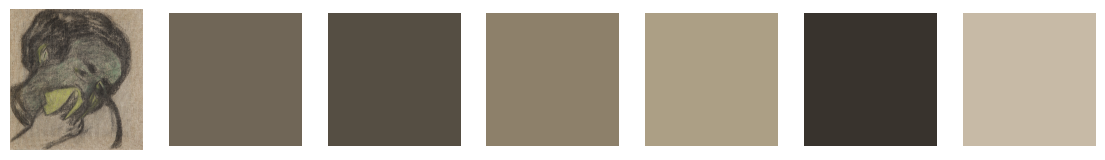

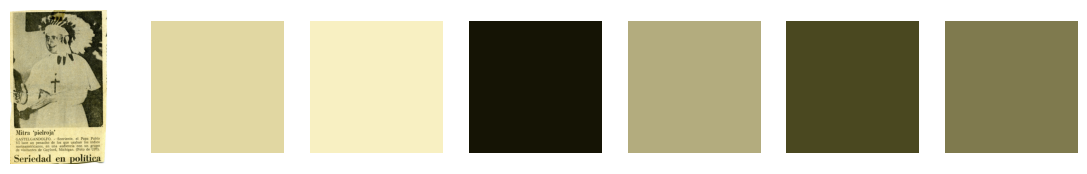

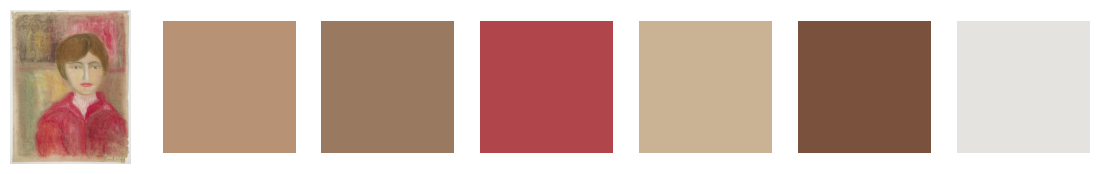

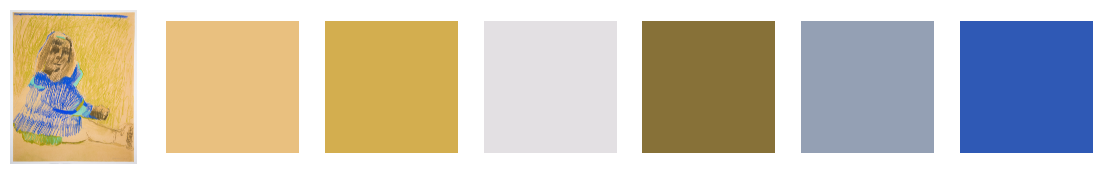

In [53]:
for i, image in enumerate(images[:10]):
    if image is not None:
        img_palette = ast.literal_eval(palette_img[i])
        show_palette(img_palette, img=image)